In [1]:
%pylab inline
import matplotlib.pyplot as plt

#import matplotlib
#matplotlib.style.use('ggplot') ## gnuplot style

import numpy as np
import pandas as pd

import warnings as wn
import partial_corr


#size
width, height=12,8
plt.rcParams['figure.figsize'] = width, height #aggiunta pt

#precision in tables
pd.set_option('precision',2)
#rows in tables
pd.set_option('display.max_rows', 1000)

# this is used for regression below; install (via pip) statsmodels and patsy
import statsmodels.formula.api as sm

Populating the interactive namespace from numpy and matplotlib


In [2]:
# to chose a csv file in the current folder
import os
filesHere=os.listdir("./")
selected=[]
for i in range(len(filesHere)):
    if filesHere[i].find('_ts.csv')>0: selected.append(filesHere[i])
selected.sort()
for i in range(len(selected)):
    print (i, selected[i])

0 20170403_12-59-02_ts.csv


In [3]:
num=int(input("Choose a file via its number (>=0;<="+str(len(selected)-1)+" "))

try:
    modPars_df = pd.read_csv(selected[num][:17]+'_modPars.csv')
    modPars_df.index += 1 
except BaseException:
    modPars_df = pd.DataFrame([["no changes in parameters"]],columns=["  "])
    modPars_df.index += 1

firms=False
    
try:
    firms_df = pd.read_csv(selected[num][:17]+'_firms.csv')
    modPars_df.index += 1 
    firms=True
except BaseException:
    pass


par_df = pd.read_csv(selected[num][:17]+'_par.csv')
par_df.index += 1 

ts_df = pd.read_csv(selected[num])
#set index to start from 1, data are collected at the end of each period
ts_df.index += 1 

str_df = pd.read_csv(selected[num][:17]+'_str.csv')
#leave index to start from 0, data are collected at the beginning of each period

Choose a file via its number (>=0;<=0 0


***Parameters***

In [4]:
par_df.astype(str,errors='ignore')

,Parameter names,Values
1,project version,5b
2,build,20170403
3,seed (1 gets it from the clock),111
4,wage base,1.0
5,social welfare compensation,0.3
6,labor productivity,1
7,expected employment ratio at t=1,0.9
8,consumption behavior: a1,0.4
9,consumption behavior: b1,0.55
10,consumption behavior: a2,0.3


***Modified parameters***

In [5]:
modPars_df.astype(str,errors='ignore')

,
1,no changes in parameters


***Time series, data collected at the end of each period***

In [6]:
ts_df

,unemployed,totalProfit,totalProduction,plannedProduction,price,wage
1,1102.0,1103.68,8908.00,8908.00,1.12,1.00
2,1162.0,-175.01,8848.00,8852.25,0.98,1.00
3,2208.0,-413.26,7802.00,7806.26,0.95,1.00
4,2624.0,-498.82,7284.59,7392.05,0.95,1.00
5,2675.0,544.99,7335.00,7340.47,1.07,1.00
6,1807.0,48.12,8140.69,8209.32,1.01,1.00
7,2488.0,1439.31,7480.47,7528.48,1.20,1.15
8,1044.0,-564.14,8941.16,8975.05,1.16,1.00
9,1629.0,-559.93,8353.61,8392.65,1.01,1.00
10,2742.0,-508.16,7185.54,7277.03,1.02,1.00


In [7]:
ts_df.describe()

,unemployed,totalProfit,totalProduction,plannedProduction,price,wage
count,50.00,50.00,50.00,50.00,50.00,50.00
mean,2883.54,238.99,7505.07,7555.38,1.12,1.03
std,937.16,843.77,798.67,797.19,0.12,0.06
min,1044.00,-1521.06,5856.91,5935.98,0.95,1.00
25%,2509.75,-385.51,7055.58,7095.64,1.02,1.00
50%,2887.00,91.61,7487.32,7537.76,1.11,1.00
75%,3411.75,919.87,8081.41,8147.67,1.21,1.00
max,4988.00,1766.30,9061.55,9116.71,1.34,1.15


In [8]:
ts_df.corr(method="pearson").style.format("{:.2}")

,unemployed,totalProfit,totalProduction,plannedProduction,price,wage
unemployed,1.0,-0.18,-0.57,-0.56,-0.022,-0.019
totalProfit,-0.18,1.0,-0.36,-0.37,0.53,0.77
totalProduction,-0.57,-0.36,1.0,1.0,0.016,-0.25
plannedProduction,-0.56,-0.37,1.0,1.0,0.023,-0.25
price,-0.022,0.53,0.016,0.023,1.0,0.46
wage,-0.019,0.77,-0.25,-0.25,0.46,1.0


In [9]:
np.set_printoptions(precision=3)
ts=ts_df.values
ts_int = np.hstack((np.ones((ts.shape[0],1)), ts))

warnings.filterwarnings(action="ignore", module="scipy", 
                        message="^internal gelsd")
partial_corr.partial_corr(ts_int)[1:, 1:]

/Users/pt/Desktop/prove/g-20170403_12-59-02/partial_corr.py:58: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]


array([[ 1.   , -0.597, -0.088,  0.05 ,  0.35 ,  0.295],
       [-0.597,  1.   ,  0.214, -0.246,  0.555,  0.68 ],
       [-0.088,  0.214,  1.   ,  0.999, -0.31 , -0.082],
       [ 0.05 , -0.246,  0.999,  1.   ,  0.333,  0.094],
       [ 0.35 ,  0.555, -0.31 ,  0.333,  1.   , -0.079],
       [ 0.295,  0.68 , -0.082,  0.094, -0.079,  1.   ]])

In [10]:
ts=ts_df.drop(columns="plannedProduction").values
ts_int = np.hstack((np.ones((ts.shape[0],1)), ts))

partial_corr.partial_corr(ts_int)[1:, 1:]

array([[ 1.   , -0.629, -0.762,  0.389,  0.301],
       [-0.629,  1.   , -0.652,  0.518,  0.681],
       [-0.762, -0.652,  1.   ,  0.453,  0.242],
       [ 0.389,  0.518,  0.453,  1.   , -0.05 ],
       [ 0.301,  0.681,  0.242, -0.05 ,  1.   ]])

In [11]:
ts=ts_df.drop(columns="totalProduction").values
ts_int = np.hstack((np.ones((ts.shape[0],1)), ts))

partial_corr.partial_corr(ts_int)[1:, 1:]

array([[ 1.   , -0.633, -0.76 ,  0.398,  0.304],
       [-0.633,  1.   , -0.659,  0.526,  0.681],
       [-0.76 , -0.659,  1.   ,  0.467,  0.247],
       [ 0.398,  0.526,  0.467,  1.   , -0.056],
       [ 0.304,  0.681,  0.247, -0.056,  1.   ]])

In [12]:
result = sm.ols(formula="totalProfit ~ price + wage + totalProduction + unemployed", \
                data=ts_df).fit()

print (result.summary())

                            OLS Regression Results                            
Dep. Variable:            totalProfit   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     46.25
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           2.18e-15
Time:                        21:34:24   Log-Likelihood:                -366.55
No. Observations:                  50   AIC:                             743.1
Df Residuals:                      45   BIC:                             752.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4034.6771   1450.957     

***Structural infos, data collected at the beginning of each period***

In [13]:
str_df

,entrepreneurs,workers
0,10.0,10000.0
1,10.0,10000.0
2,10.0,10000.0
3,10.0,10000.0
4,10.0,10000.0
5,10.0,10000.0
6,10.0,10000.0
7,20.0,9990.0
8,20.0,9990.0
9,20.0,9990.0


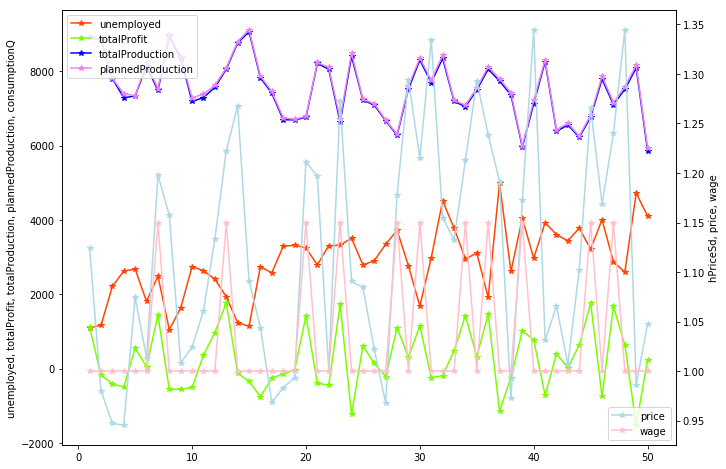

In [14]:
myPlot = ts_df.plot(figsize=(11,8),secondary_y=['hPriceSd', 'price','wage'],marker="*",
color=["OrangeRed","LawnGreen","Blue","Violet","lightblue","Pink","Gray","Brown"])
myPlot.set_ylabel('unemployed, totalProfit, totalProduction, plannedProduction, consumptionQ')
myPlot.right_ax.set_ylabel('hPriceSd, price, wage')
myPlot.legend(loc='upper left') #, bbox_to_anchor=(-0.35, 0.5)
myPlot.axes.right_ax.legend(loc='lower right') #, bbox_to_anchor=(1.1, 0.5)

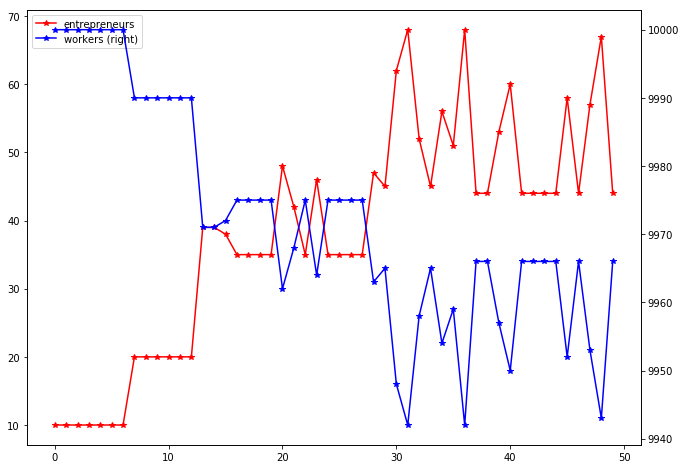

In [15]:
str_df.plot(figsize=(11,8),secondary_y='workers',marker="*",color=["r","b"])

Best solutions to produce a LaTeX table from these data (the example is related to ts_df.corr table):

    corr=ts_df.corr(method='pearson')
    print corr.to_latex()
    
    "print" to have the output nicely formatted; copy and paste it to LaTeX and the 
    result works.
    
To use caption and label with tabular simply include that output within:

    \begin{table}
    
    output above
    
    \label{a label}
    \caption{a caption}
    \end{table}

    You can add the usual [htbp] specification as \begin{table}[htbp]


Other solutions:
1. online [http://www.tablesgenerator.com](http://www.tablesgenerator.com), reading the csv file;
2. using a converter as [http://html2latex.sourceforge.net](http://html2latex.sourceforge.net).

## The first method is applied in the cell below.

In [16]:
corr=ts_df.corr(method='pearson')
def ff(x):
    return '%1.2f' % x
print (corr.to_latex(formatters=[ff,ff,ff,ff,ff,ff,ff,ff]))

\begin{tabular}{lrrrrrr}
\toprule
{} & unemployed & totalProfit & totalProduction & plannedProduction & price &  wage \\
\midrule
unemployed        &       1.00 &       -0.18 &           -0.57 &             -0.56 & -0.02 & -0.02 \\
totalProfit       &      -0.18 &        1.00 &           -0.36 &             -0.37 &  0.53 &  0.77 \\
totalProduction   &      -0.57 &       -0.36 &            1.00 &              1.00 &  0.02 & -0.25 \\
plannedProduction &      -0.56 &       -0.37 &            1.00 &              1.00 &  0.02 & -0.25 \\
price             &      -0.02 &        0.53 &            0.02 &              0.02 &  1.00 &  0.46 \\
wage              &      -0.02 &        0.77 &           -0.25 &             -0.25 &  0.46 &  1.00 \\
\bottomrule
\end{tabular}



## *Data from each firm in each period*

In [17]:
if firms: print(firms_df.describe())
else: print('no data for each firm in each period')

no data for each firm in each period
